In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import os
import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import load_model

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

from keras.datasets import mnist

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

Using TensorFlow backend.


In [2]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()
width=28
height=28

# 데이터가 0 부터 255로 구성되어 있음으로 255로 나누어서 정규화
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_test = y_test % 2
print(y_train[0:10])

[1 0 0 1 1 0 1 1 1 0]


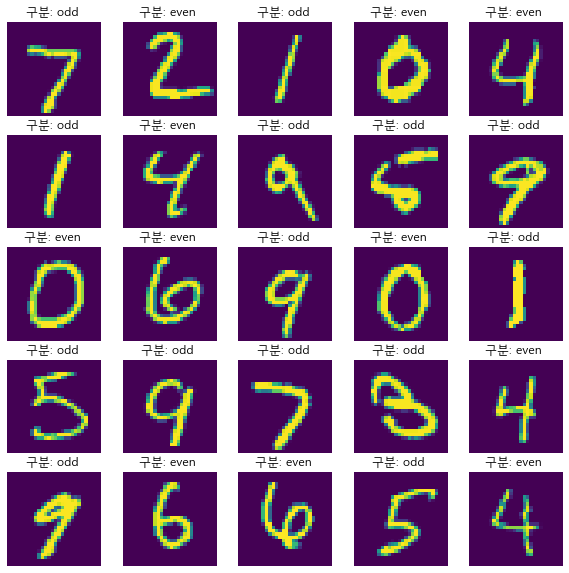

In [3]:
# 데이터 확인
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col) # 5행 5열

for i in range(plt_row*plt_col): # 0 ~ 24
    sub_plt = axarr[i//plt_row, i%plt_col] # 행열 위치 설정
    sub_plt.axis('off') # 축 출력 생략
    
    # 1차원 배열 -> 2차원 배열로 변경
    sub_plt.imshow(x_test[i].reshape(width, height))  # 784 -> 28행 28열로 변경
    
    sub_plt_title = '구분: ' 
    
    if y_test[i] :  # 1: True, 0: False
        sub_plt_title += 'odd '  # 1
    else:
        sub_plt_title += 'even ' # 0
    
    sub_plt.set_title(sub_plt_title) # 이미지 제목

plt.show()


### 1. 다층 퍼셉트론(Dense: 밀집층, 전결합층)

In [3]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()
width=28
height=28

# 데이터가 0 부터 255로 구성되어 있음으로 255로 나누어서 정규화
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_test = y_test % 2

model = Sequential()
# 입력값의 갯수 : 784, signoid : 이항분류

model.add(Dense(784, input_dim=width*height, activation='relu')) # 입력 값: 784
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='loss', patience=10)

start = time.time()
# validation_split = 0.33: 33% 검증 데이터로 사용
hist = model.fit(x_train, y_train, validation_split = 0.33, shuffle=True, epochs=2, 
                     batch_size=50, callbacks=[early_stopping])
# validation_split
# shuffle
# epochs 
# batch_size

end = time.time()
print('Runtime: %0.2f 초' % (end-start))
# CPU: 42 초
# GPU: 19 초 

Train on 40199 samples, validate on 19801 samples
Epoch 1/2
40199/40199 [==============================] - 22s 540us/step - loss: 0.1051 - acc: 0.9612 - val_loss: 0.0839 - val_acc: 0.9701
Epoch 2/2
40199/40199 [==============================] - 7s 174us/step - loss: 0.0467 - acc: 0.9830 - val_loss: 0.0603 - val_acc: 0.9809
Runtime: 29.00 초


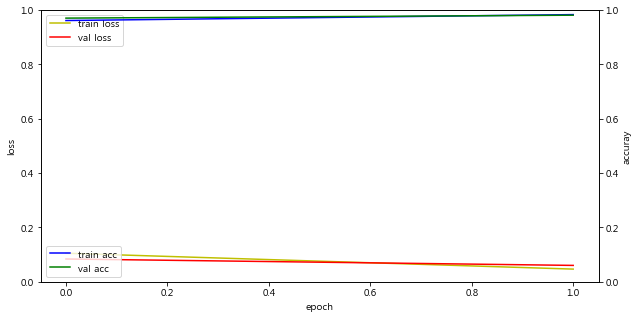

In [5]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')   # 훈련 손실
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 검증 손실, 학습의 우수성 평가 척도
loss_ax.set_ylim([0.0, 1.0]) # 왼쪽 y 축, 값을 반영하여 변경

acc_ax.plot(hist.history['acc'], 'b', label='train acc')   # 훈련 정확도
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc') # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])  # 오른쪽 y 축, 0 ~100 %를 의미

loss_ax.set_xlabel('epoch')  # x축 레이블
loss_ax.set_ylabel('loss')     # 왼쪽 y 레이블
acc_ax.set_ylabel('accuray') # 오른쪽 y 레이블

loss_ax.legend(loc='upper left')  # 좌측 y 축 기준 범례 위치 설정
acc_ax.legend(loc='lower left')   # 우측 y 축 기준 범례 위치 설정

plt.show()


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=50)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

10000/10000 [==============================] - 0s 44us/step
손실값: 0.05443428922968451 /정확도: 98.2100002169609 %


In [8]:
model.save('./cnn_mnist2.h5')

In [9]:
model = load_model('./cnn_mnist2.h5')

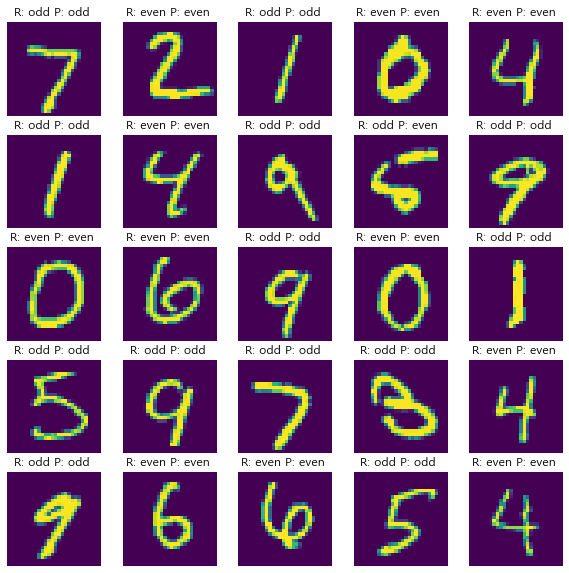

In [10]:
# 모델 사용하기
yp= model.predict(x_test, batch_size=32)

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '   # 실제값
    
    # 실제값
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    sub_plt_title += 'P: '  # 예측값
    
    # 예측한값
    if yp[i] >= 0.5 :   # 0.5 기준 짝수 홀수 분류
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '        
    
    sub_plt.set_title(sub_plt_title)

plt.show()

### 2. Conv 넷, CNN

In [11]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()
width=28
height=28

# 데이터가 0 부터 255로 구성되어 있음으로 255로 나누어서 정규화
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_test = y_test % 2

model = Sequential()
# 32: 마스크(커널, 필터)의 갯수
# (3, 3): 마스크(커널, 필터)의 크기
# input_shape = (width, height, 1): 28 X 28 픽셀의 흑백(1) 이미지
model.add(Conv2D(32, (3, 3), input_shape = (width, height, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

# 2행 2열에서 가장 큰값 1개만 사용, 50% 감소
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 2차원 텐서(행렬)을 1차원 텐서(1차원 배열)로 변환
model.add(Flatten()) # 2차원 텐서를 1차원 텐서로 변환

model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='loss', patience=10)

start = time.time()
# validation_split = 0.33: 33% 검증 데이터로 사용
hist = model.fit(x_train, y_train, validation_split = 0.33, shuffle=True, epochs=2, 
                     batch_size=50, callbacks=[early_stopping])
end = time.time()
print('Runtime: %0.2f 초' % (end-start))
# CPU: 342 초
# GPU: 36 초 

Train on 40199 samples, validate on 19801 samples
Epoch 1/2
40199/40199 [==============================] - 17s 413us/step - loss: 0.1444 - acc: 0.9451 - val_loss: 0.0701 - val_acc: 0.9750
Epoch 2/2
40199/40199 [==============================] - 12s 293us/step - loss: 0.0690 - acc: 0.9770 - val_loss: 0.0630 - val_acc: 0.9782
Runtime: 28.70 초


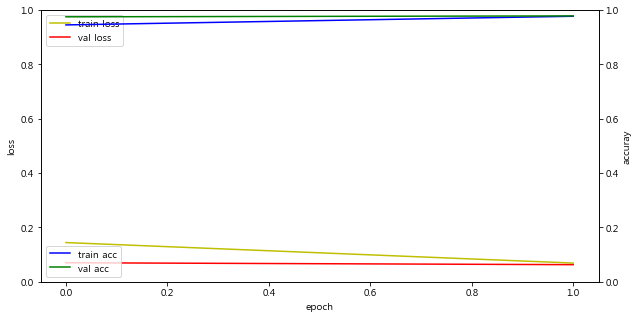

In [13]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')   # 훈련 손실
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 검증 손실, 학습의 우수성 평가 척도
loss_ax.set_ylim([0.0, 1.0]) # 왼쪽 y 축, 값을 반영하여 변경

acc_ax.plot(hist.history['acc'], 'b', label='train acc')   # 훈련 정확도
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc') # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])  # 오른쪽 y 축, 0 ~100 %를 의미

loss_ax.set_xlabel('epoch')  # x축 레이블
loss_ax.set_ylabel('loss')     # 왼쪽 y 레이블
acc_ax.set_ylabel('accuray') # 오른쪽 y 레이블

loss_ax.legend(loc='upper left')  # 좌측 y 축 기준 범례 위치 설정
acc_ax.legend(loc='lower left')   # 우측 y 축 기준 범례 위치 설정

plt.show()


In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=50)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

10000/10000 [==============================] - 1s 87us/step
손실값: 0.05788875201134942 /정확도: 98.04000043869019 %


In [15]:
model.save('./cnn_mnist2_conv.h5')

In [16]:
model = load_model('./cnn_mnist2_conv.h5')

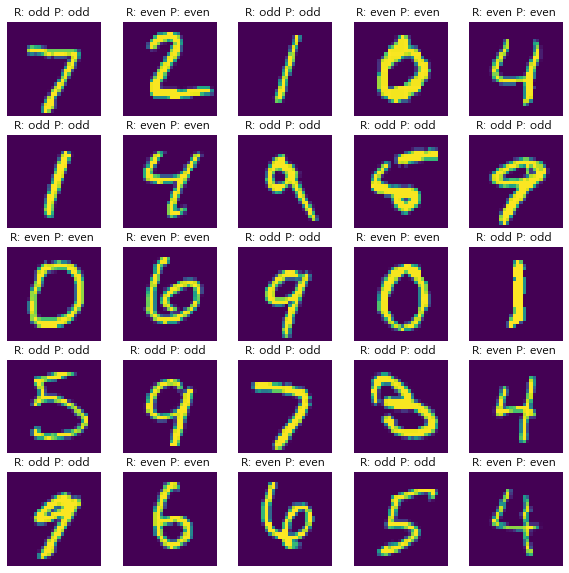

In [17]:
# 모델 사용하기
yp= model.predict(x_test, batch_size=32)

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '   # 실제값
    
    # 실제값
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    sub_plt_title += 'P: '  # 예측값
    
    # 예측한값
    if yp[i] >= 0.5 :   # 0.5 기준 짝수 홀수 분류
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '        
    
    sub_plt.set_title(sub_plt_title)

plt.show()